# Modeling

Importing different packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot

%matplotlib inline


Importing the csv file. Cleaning of file by dropping unneccesary columns, taking care of nan values, and creating new columns.
Creating X and y to by taking price out of dataframe and into y.

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.date = pd.to_datetime(df.date)
df.waterfront = df.waterfront.fillna(value = 0)
df = df.drop(columns = ['view','lat', 'long', 'zipcode', 'sqft_basement'])
#df.yr_renovated.fillna(value = 0, inplace = True) 
df['yard'] = df.sqft_lot - df.sqft_living
df['ratio_15'] = df.sqft_living/df.sqft_living15
df['years_old'] = 2020 - df.yr_built
s = pd.get_dummies(df.condition, drop_first = True, prefix = 'condition')
df = pd.concat([df, s], axis = 1)
df = df.drop(columns = ['condition'])
df.head()
y = df.price
X = df.drop(columns = ['price'])


Creating a dummy regressor model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)


0.0

Checking the RMSE for our dummy model.

In [5]:
y_pred = dummy.predict(X_train)
from sklearn.metrics import mean_squared_error
dummy_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
dummy_rmse

372015.8723643869

The real model using sqft_living

In [6]:
formula = "price ~ sqft_living"
data_ols = pd.concat([X_train, y_train], axis = 1)

model_sqft = ols(formula= formula, data= data_ols).fit()
model_sqft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:19:04   Log-Likelihood:            -2.4032e+05
No. Observations:               17277   AIC:                         4.806e+05
Df Residuals:                   17275   BIC:                         4.807e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.57e+04   4993.714     -9.152      0.000   -5.55e+04   -3.59e+04
sqft_living   281.6056      2.189    128.634      0.000     277.315     285.897
==============================================================================
Omnibus:                    12287.594   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           502138.509
Skew:                           2.943   Prob(JB):                         0.00
Kurtosis:                      28.747   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
y_pred = model_sqft.predict(X_train)
model_sqft_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_sqft_rmse

265871.8790296068

Graphing price and sqrt_living with our regression line.

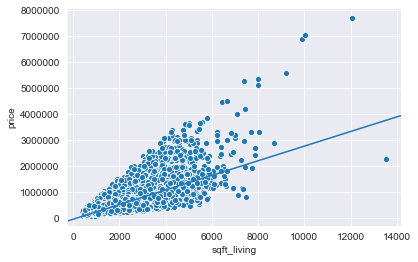

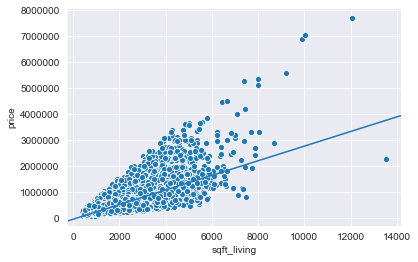

In [8]:
sns.set_style('darkgrid')
#fig = sm.graphics.plot_regress_exog(data_ols, "price")
fig, ax = plt.subplots()
sns.scatterplot(x = data_ols.sqft_living, y = data_ols.price)
abline_plot(model_results=model_sqft, ax=ax)

Checking other predictors.

In [9]:
formula = "price ~ sqft_living + condition_2 + condition_3 + condition_4 + condition_5"
data_ols = pd.concat([X_train, y_train], axis = 1)

model_two = ols(formula= formula, data= data_ols).fit()
model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3396.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:19:09   Log-Likelihood:            -2.4021e+05
No. Observations:               17277   AIC:                         4.804e+05
Df Residuals:                   17271   BIC:                         4.805e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept        2e+04   5.77e+04      0.347      0.729   -9.31e+04    1.33e+05
sqft_living   283.7182      2.192    129.451      0.000     279.422     288.014
condition_2 -9.774e+04   6.19e+04     -1.578      0.114   -2.19e+05    2.36e+04
condition_3  -8.75e+04   5.78e+04     -1.515      0.130   -2.01e+05    2.57e+04
condition_4 -5.305e+04   5.78e+04     -0.918      0.359   -1.66e+05    6.03e+04
condition_5  1.868e+04   5.81e+04      0.321      0.748   -9.53e+04    1.33e+05
==============================================================================
Omnibus:                    12317.028   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513085.522
Skew:                           2.947   Prob(JB):                         0.00
Kurtosis:                      29.038   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
y_pred = model_two.predict(X_train)
model_two_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_two_rmse

264173.2388625841

In [11]:
formula = "price ~ sqft_living + grade + waterfront + years_old + ratio_15"
data_ols = pd.concat([X_train, y_train], axis = 1)

model_five = ols(formula= formula, data= data_ols).fit()
model_five.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     6029.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:19:18   Log-Likelihood:            -2.3740e+05
No. Observations:               17277   AIC:                         4.748e+05
Df Residuals:                   17271   BIC:                         4.749e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.764e+05   1.79e+04    -54.461      0.000   -1.01e+06   -9.41e+05
sqft_living   199.9340      3.476     57.525      0.000     193.121     206.747
grade        1.334e+05   2467.811     54.063      0.000    1.29e+05    1.38e+05
waterfront   8.105e+05   2.16e+04     37.590      0.000    7.68e+05    8.53e+05
years_old    3591.0536     65.162     55.109      0.000    3463.329    3718.778
ratio_15    -9.693e+04   6687.463    -14.495      0.000    -1.1e+05   -8.38e+04
==============================================================================
Omnibus:                    13352.225   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1010499.346
Skew:                           3.129   Prob(JB):                         0.00
Kurtosis:                      39.940   Cond. No.                     2.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
y_pred = model_five.predict(X_train)
model_five_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_five_rmse

224526.43788567488

In [13]:
formula = "price ~ bathrooms + grade + waterfront + years_old + ratio_15"
data_ols = pd.concat([X_train, y_train], axis = 1)

model_six = ols(formula= formula, data= data_ols).fit()
model_six.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     5060.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:20:04   Log-Likelihood:            -2.3833e+05
No. Observations:               17277   AIC:                         4.767e+05
Df Residuals:                   17271   BIC:                         4.767e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.512e+06   1.54e+04    -97.937      0.000   -1.54e+06   -1.48e+06
bathrooms   1.252e+05   3603.198     34.747      0.000    1.18e+05    1.32e+05
grade       1.992e+05   2087.093     95.456      0.000    1.95e+05    2.03e+05
waterfront  8.617e+05   2.27e+04     37.924      0.000    8.17e+05    9.06e+05
years_old   4550.2752     73.395     61.997      0.000    4406.414    4694.136
ratio_15    3.194e+04   6355.527      5.026      0.000    1.95e+04    4.44e+04
==============================================================================
Omnibus:                    15119.423   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1649749.027
Skew:                           3.714   Prob(JB):                         0.00
Kurtosis:                      50.292   Cond. No.                         729.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y_pred = model_six.predict(X_train)
model_six_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_six_rmse

236951.60963766123

In [15]:
formula = "price ~ sqft_living + sqft_lot + waterfront + years_old + ratio_15"
data_ols = pd.concat([X_train, y_train], axis = 1)

model_seven = ols(formula= formula, data= data_ols).fit()
model_seven.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     4682.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:20:28   Log-Likelihood:            -2.3872e+05
No. Observations:               17277   AIC:                         4.775e+05
Df Residuals:                   17271   BIC:                         4.775e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.558e+04   7620.899    -11.230      0.000   -1.01e+05   -7.06e+04
sqft_living   339.5588      2.605    130.338      0.000     334.452     344.665
sqft_lot       -0.3356      0.045     -7.478      0.000      -0.424      -0.248
waterfront   8.449e+05   2.33e+04     36.315      0.000    7.99e+05    8.91e+05
years_old    2467.2366     66.650     37.018      0.000    2336.597    2597.876
ratio_15    -1.918e+05   6973.297    -27.508      0.000   -2.05e+05   -1.78e+05
==============================================================================
Omnibus:                    10775.171   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           385419.632
Skew:                           2.449   Prob(JB):                         0.00
Kurtosis:                      25.615   Cond. No.                     5.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y_predict = model_seven.predict(X_train)

In [17]:
model7_rmse = np.sqrt(mean_squared_error(y_train, y_predict))
model7_rmse

242390.8985032657

In [34]:
#from sklearn.linear_model import LinearRegression

#lr = LinearRegression()
#lr.fit(X = X_train, y = y_train)

#y_pred = lr.predict(X_train)
#lr.score(X_train, y_train)

#model_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
#model_rmse

from sklearn.model_selection import cross_val_score
cross_val_score(estimator=model_seven, X=X_train, y=y_train, cv = 5)

TypeError: estimator should be an estimator implementing 'fit' method, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc428b2beb8> was passed